In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [4]:
# Loading 
from google.colab import files
uploaded = files.upload()
data=pd.read_csv("diabetes.csv")
data.head()

Saving diabetes.csv to diabetes (1).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data = data.rename(index=str, columns={"6":"preg"})
data = data.rename(index=str, columns={"148":"gluco"})
data = data.rename(index=str, columns={"72":"bp"})
data = data.rename(index=str, columns={"35":"stinmm"})
data = data.rename(index=str, columns={"0":"insulin"})
data = data.rename(index=str, columns={"33.6":"mass"})
data =data.rename(index=str, columns={"0.627":"dpf"})
data = data.rename(index=str, columns={"50":"age"})
data = data.rename(index=str, columns={"1":"target"})

data = data.drop('BMI', axis=1)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1


In [8]:

X = data.iloc[:, :-1]
Y = data.iloc[:,7]

In [9]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0              6      148             72             35        0   
1              1       85             66             29        0   
2              8      183             64              0        0   
3              1       89             66             23       94   
4              0      137             40             35      168   
..           ...      ...            ...            ...      ...   
763           10      101             76             48      180   
764            2      122             70             27        0   
765            5      121             72             23      112   
766            1      126             60              0        0   
767            1       93             70             31        0   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21 

In [10]:

X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
from keras.models import Sequential
np.random.seed(42)
tf.random.set_seed(42)
 
model=Sequential()
model.add(Dense(15,input_dim=7, activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=['accuracy'])
model_history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))


Epoch 1/200
14/14 [==============================] - 2s 32ms/step - loss: 0.7170 - accuracy: 0.4444 - val_loss: 0.7109 - val_accuracy: 0.4097
Epoch 2/200
14/14 [==============================] - 0s 7ms/step - loss: 0.6972 - accuracy: 0.5162 - val_loss: 0.6945 - val_accuracy: 0.5139
Epoch 3/200
14/14 [==============================] - 0s 7ms/step - loss: 0.6995 - accuracy: 0.5162 - val_loss: 0.6815 - val_accuracy: 0.5903
Epoch 4/200
14/14 [==============================] - 0s 7ms/step - loss: 0.6763 - accuracy: 0.5995 - val_loss: 0.6709 - val_accuracy: 0.6528
Epoch 5/200
14/14 [==============================] - 0s 8ms/step - loss: 0.6608 - accuracy: 0.6644 - val_loss: 0.6619 - val_accuracy: 0.6806
Epoch 6/200
14/14 [==============================] - 0s 6ms/step - loss: 0.6594 - accuracy: 0.6690 - val_loss: 0.6540 - val_accuracy: 0.6875
Epoch 7/200
14/14 [==============================] - 0s 6ms/step - loss: 0.6591 - accuracy: 0.6875 - val_loss: 0.6473 - val_accuracy: 0.7083
Epoch 8/200


In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy*100}%")

6/6 [==============================] - 0s 6ms/step - loss: 0.5433 - accuracy: 0.7396
Test loss: 0.543309211730957, Test accuracy: 73.95833134651184%


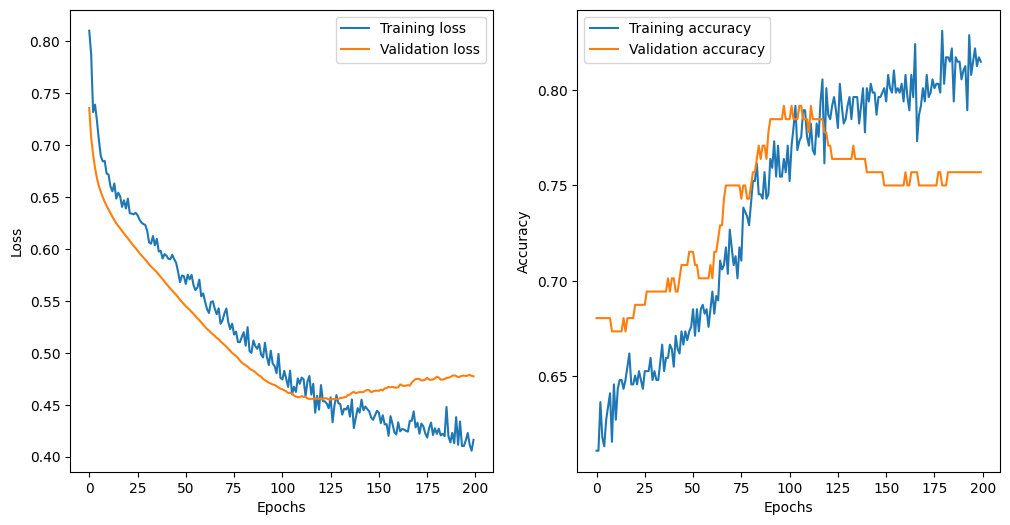

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'], label='Training loss')
plt.plot(model_history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_history.history['accuracy'], label='Training accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()